# MIE 1624 : Introduction to Data Science and Analytics
## Assignment 2
### bambarde_1005618002

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# For Cleaning and Decoding
import re
import html
import unicodedata
import string

In [3]:
# For Preparing Features to Model
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalbambardekar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
## For Data Exploration
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

In [5]:
## For building models    
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm

from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB

In [6]:
# For evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing Datasets
## generic_tweets.txt
## Canadian_elections_2019.csv
## stop_words.txt

In [7]:
# Loading Datasets
generic_data=pd.read_csv('generic_tweets.txt')
canadian_data = pd.read_csv('Canadian_elections_2019.csv', encoding='utf-8')


## Loading stopwords to filter words while cleaning the tweets
stop_words = open('stop_words.txt','r').read()

## Taking a look at the general tweets
generic_data.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
canadian_data.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


In order to preserve the original data to access it later if the dataframe is lost during analysis, copying the dataframes into a new one. Analysis shall be formed on the copied data frame

In [9]:
generic_data_1 = generic_data.copy()
canadian_data_1=canadian_data.copy()

In [10]:
# Since the colums such as mentioned below dont necesarily affect the analysis, we drop them
generic_data_1=generic_data_1.drop(['id','date','query','user'],axis=1)
generic_data_1.head()

,class,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Step 1: Data Cleaning
**Steps followed:**
1. Lowering the case of all the text
2. Removal of URL links and twitter handles
3. Removal of HTML attributes such as </>
4. Parsing of HTML character codes into their ASCII equivalent

In [11]:
def clean_generic(tweet):
    
    '''Function to clean General Tweets dataset'''
    
    tweet_comb = []
    
    word = tweet.lower()  # converting text into lowercase

    word = re.sub(r'http\S+', '', word)  # removing URL Links
    word = re.sub(r'www.\S+', '', word)

    word = re.sub(r'@\S+', '', word)  # removing twitter handles

    comp = re.compile(r'<\n>?]')
    word = re.sub(comp, '', word)  # removing HTML attributes

    word = html.unescape(word)  # converting HTML character codes into their ASCII Equivalent

    tweet_comb.append(word)
    
    return str(tweet_comb)

In [12]:
def clean_canadian(tweet):
    
    '''Function to clean General Tweets dataset'''
    
    tweet_comb = []
    
    word = tweet.lower()  # converting text into lowercase

    word = re.sub(r'http\S+', '', word)  # removing URL Links
    word = re.sub(r'www.\S+', '', word)

    word = re.sub(r'@\S+', '', word)  # removing twitter handles

    comp = re.compile(r'<\n>?]')
    word = re.sub(comp, '', word)  # removing HTML attributes

    word = html.unescape(word)  # converting HTML character codes into their ASCII Equivalent

    tweet_comb.append(word)
    
    return str(tweet_comb)

In [13]:
## Applying the respective functions on respective tweets of the datasets

generic_data_1['textclean'] = generic_data_1['text'].apply(lambda x: clean_generic(x))
canadian_data_1['textclean'] = canadian_data_1['text'].apply(lambda x: clean_canadian(x))

In [14]:
canadian_data_1.head()

,sentiment,negative_reason,text,textclean
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","['b""#allwomanspacewalk it\'s real!\\n \\n#etob..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","['b""#canada #canadaelection2019 #canadavotes \..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav..."


In [15]:
generic_data_1.head()

,class,text,textclean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","["" - awww, that's a bummer. you shoulda got ..."
1,0,is upset that he can't update his Facebook by ...,"[""is upset that he can't update his facebook b..."
2,0,@Kenichan I dived many times for the ball. Man...,[' i dived many times for the ball. managed to...
3,0,my whole body feels itchy and like its on fire,['my whole body feels itchy and like its on fi...
4,0,"@nationwideclass no, it's not behaving at all....","["" no, it's not behaving at all. i'm mad. why ..."


In [16]:
#Generic Tweets

s1 = ' '
corpus_clean_generic_data = []

for line in generic_data_1['textclean']: 

    tokenizer = RegexpTokenizer(r'\w+') # Intializing Tokenizer based on white spaces rule     

    b = tokenizer.tokenize(line)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # removing stop words
    words_rmStop = [word for word in b if word not in stop_words]

    sb = SnowballStemmer(language='english')
    words_stem = [sb.stem(word) for word in words_rmStop] # stemming the tweets

    corpus_clean_generic_data.append(s1.join(words_stem))

In [17]:
#Canadian Tweets

s1 = ' '
corpus_clean_canadian_data = []

for line in canadian_data_1['textclean']: 

    tokenizer = RegexpTokenizer(r'\w+') # Intializing Tokenizer based on white spaces rule     

    b = tokenizer.tokenize(line)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # removing stop words
    words_rmStop = [word for word in b if word not in stop_words]

    sb = SnowballStemmer(language='english')
    words_stem = [sb.stem(word) for word in words_rmStop] # stemming the tweets

    corpus_clean_canadian_data.append(s1.join(words_stem))

In [18]:
#We now will append these into the existing dataframe as textclean_tokenized
generic_data_1['textclean_tokenized']=corpus_clean_generic_data
canadian_data_1['textclean_tokenized']=corpus_clean_canadian_data

In [19]:
canadian_data_1.head()

,sentiment,negative_reason,text,textclean,textclean_tokenized
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","['b""#allwomanspacewalk it\'s real!\\n \\n#etob...",allwomanspacewalk etobicokenorth cityofto onpo...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","['b""#canada #canadaelection2019 #canadavotes \...",canada canadaelection2019 canadavot elxn43 nca...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...


# Step 2 : Data Exploratory Analysis


Assigning a given tweet the corresponding political party eg.,Liberal, Conservative or NDP

In [20]:
## Creating a column to designate the political party
canadian_data_1['political_party'] = 'None'
canadian_data_1.head()

,sentiment,negative_reason,text,textclean,textclean_tokenized,political_party
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...,None
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","['b""#allwomanspacewalk it\'s real!\\n \\n#etob...",allwomanspacewalk etobicokenorth cityofto onpo...,None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...,None
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","['b""#canada #canadaelection2019 #canadavotes \...",canada canadaelection2019 canadavot elxn43 nca...,None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...,None


We plan to different the parties based on a particular keyword that might be present in a given tweet in the tokenized data. 
For eg: Tweets containing words like justin|trudeau|justintrudeau|liberal|lpc|chooseforward would automatically be assigned 'Liberal'. Similarly different parties have their own leader, an associated party name and a tag line for the party. Following the steps :

In [21]:
for i in range(len(canadian_data_1['textclean'])):
    
    if ((pd.Series(canadian_data_1['textclean'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]) & (pd.Series(canadian_data_1['textclean'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0])) | ((pd.Series(canadian_data_1['textclean'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]) & (pd.Series(canadian_data_1['textclean'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0])) | ((pd.Series(canadian_data_1['textclean'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]) & (pd.Series(canadian_data_1['textclean'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0])):
        canadian_data_1['political_party'][i] = 'Mixed'
    
    elif (pd.Series(canadian_data_1['textclean'][i]).str.contains('justin|trudeau|justintrudeau|liberal|lpc')[0]):
        canadian_data_1['political_party'][i] = 'Liberal'
        
    elif (pd.Series(canadian_data_1['textclean'][i]).str.contains('andrew|scheer|andrewscheer|conservative|cpc')[0]):
        canadian_data_1['political_party'][i] = 'Conservative'
                    
    elif (pd.Series(canadian_data_1['textclean'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0]):
        canadian_data_1['political_party'][i] = 'NDP'  
        
    else:
        canadian_data_1['political_party'][i] = 'None'  

In [22]:
canadian_data_1.head()

,sentiment,negative_reason,text,textclean,textclean_tokenized,political_party
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...,Conservative
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","['b""#allwomanspacewalk it\'s real!\\n \\n#etob...",allwomanspacewalk etobicokenorth cityofto onpo...,None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...,Liberal
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","['b""#canada #canadaelection2019 #canadavotes \...",canada canadaelection2019 canadavot elxn43 nca...,None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...,Liberal


In [23]:
canadian_data_1.groupby('political_party')['political_party'].count()

political_party
Conservative     400
Liberal          263
Mixed            215
NDP              130
None            1125
Name: political_party, dtype: int64

# Figure 1: Visualising the tweets based on the parties it has got assigned to

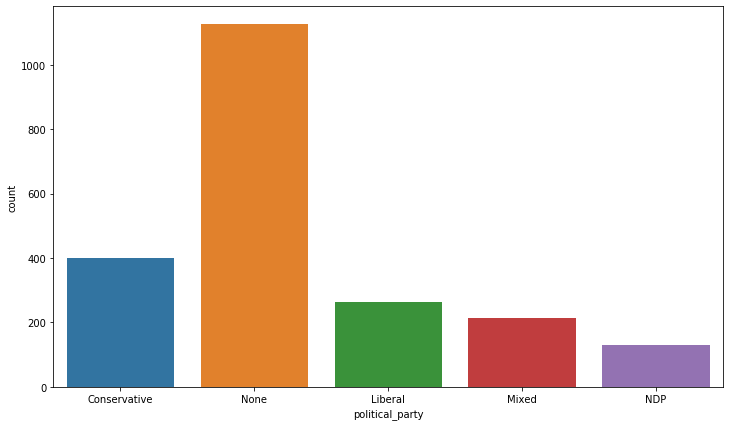

In [24]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=canadian_data_1)

In [25]:
Liberal_positive = canadian_data_1[(canadian_data_1['sentiment']=='positive') & (canadian_data_1['political_party']=='Liberal')]['political_party'].count()
Liberal_negative = canadian_data_1[(canadian_data_1['sentiment']=='negative') & (canadian_data_1['political_party']=='Liberal')]['political_party'].count()

Conservative_positive = canadian_data_1[(canadian_data_1['sentiment']=='positive') & (canadian_data_1['political_party']=='Conservative')]['political_party'].count()
Conservative_negative = canadian_data_1[(canadian_data_1['sentiment']=='negative') & (canadian_data_1['political_party']=='Conservative')]['political_party'].count()

ndp_positive = canadian_data_1[(canadian_data_1['sentiment']=='positive') & (canadian_data_1['political_party']=='NDP')]['political_party'].count()
ndp_negative = canadian_data_1[(canadian_data_1['sentiment']=='negative') & (canadian_data_1['political_party']=='NDP')]['political_party'].count()

total_positive = canadian_data_1[(canadian_data_1['sentiment']=='positive')]['political_party'].count()
total_negative = canadian_data_1[(canadian_data_1['sentiment']=='negative')]['political_party'].count()

varied_positive = canadian_data_1[(canadian_data_1['sentiment']=='positive') & (canadian_data_1['political_party']=='Mixed')]['political_party'].count()
varied_negative = canadian_data_1[(canadian_data_1['sentiment']=='negative') & (canadian_data_1['political_party']=='Mixed')]['political_party'].count()

none_positive = canadian_data_1[(canadian_data_1['sentiment']=='positive') & (canadian_data_1['political_party']=='None')]['political_party'].count()
none_negative = canadian_data_1[(canadian_data_1['sentiment']=='negative') & (canadian_data_1['political_party']=='None')]['political_party'].count()

In [26]:
print ("% of Positive tweets for Each party out of the their respective total tweets:")
print ("Liberal: %0.2f, Conservative: %0.2f, NDP: %0.2f" % ((Liberal_positive/(Liberal_positive+Liberal_negative)), (Conservative_positive/(Conservative_positive+Conservative_negative)), (ndp_positive/(ndp_positive+ndp_negative))))

print ("\n% of Negative tweets for Each party out of the their respective total tweets:")
print ("Liberal: %0.2f, Conservative: %0.2f, NDP: %0.2f" % ((Liberal_negative/(Liberal_positive+Liberal_negative)), (Conservative_negative/(Conservative_positive+Conservative_negative)), (ndp_negative/(ndp_positive+ndp_negative))))

print ("\nRatio of Positive Tweets vs Negative Tweets in Varied Tweets: %0.2f" % (varied_positive/varied_negative))

% of Positive tweets for Each party out of the their respective total tweets:
Liberal: 0.44, Conservative: 0.29, NDP: 0.68

% of Negative tweets for Each party out of the their respective total tweets:
Liberal: 0.56, Conservative: 0.71, NDP: 0.32

Ratio of Positive Tweets vs Negative Tweets in Varied Tweets: 0.78


# Figure 2 : Visualing the assigned party tweets on the basis of their nature i.e., positive and negative.

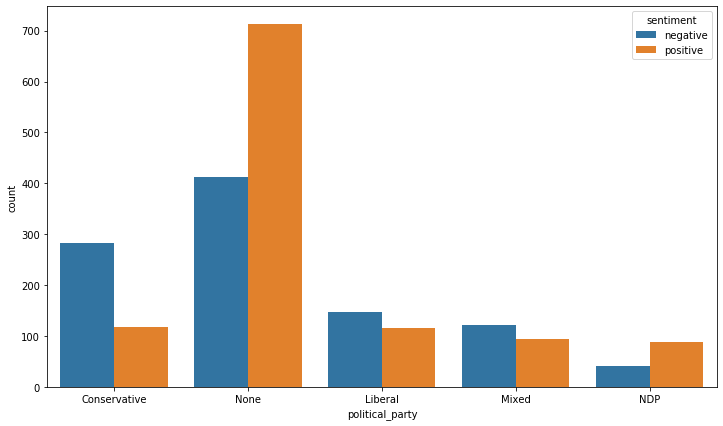

In [27]:
## Further distributing based on negative and positive sentiments

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=canadian_data_1, hue='sentiment')

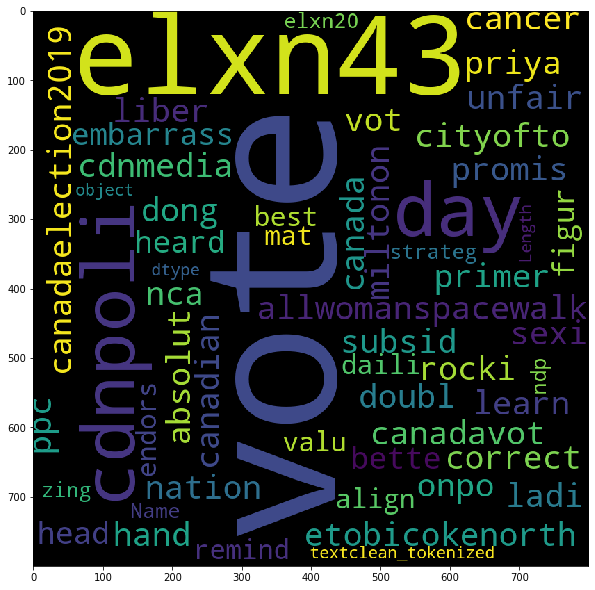

In [28]:
## WordCloud for POSITIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(str(canadian_data_1[canadian_data_1['sentiment']=='positive']['textclean_tokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.tight_layout(pad = 0) 
  
plt.show()

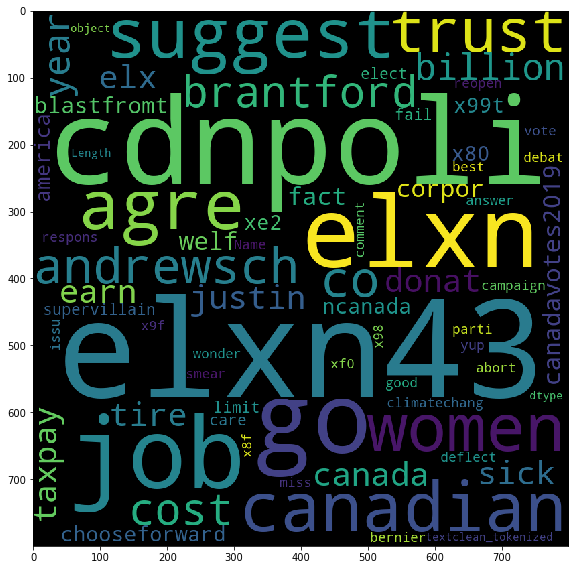

In [29]:
## WordCloud for Negative tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(str(canadian_data_1[canadian_data_1['sentiment']=='negative']['textclean_tokenized']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.tight_layout(pad = 1) 
  
plt.show()

# Inference
## Based on Figure 1 and Figure 2 we can infer that a larger portion of the tweets is accounted is unclassified (i.e., None). 
## While considering the parties Conservative Party of Canada has most number of Positive as well as Negative Tweets. 
## National Democratic Party has a balanced positive to negative sentiments' ratio.
## People of Canada actually like Justin Trudeau and the Liberals for the work they have done in the last term. It is evident by the Figure 2, though majority of the tweets are generally directed towards hailing Canada, people actually want Liberals to come to power again as Liberals actually have equal or more number of positive tweets than Conservatives


# Step 3 : Model Preparation 

## 1. Computing TF-IDF on generic tweets dataset

### TF-IDF creates a set of its own vocabulary from the entire set of documents. It is short for “term frequency - inverse document frequency”

In [30]:
# TF-IDF on Generic Tweets

vectorizer_TFIDF_generic = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time
array_TFIDF_generic = vectorizer_TFIDF_generic.fit_transform(generic_data_1['textclean_tokenized'])

print( vectorizer_TFIDF_generic.get_feature_names() )

['00', '000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '1st', '20', '22', '24', '25', '2day', '2nd', '30', '40', '50', 'absolut', 'account', 'ach', 'adam', 'addict', 'ador', 'afraid', 'afternoon', 'ago', 'agre', 'ahead', 'ahh', 'ahhh', 'aint', 'air', 'airport', 'alarm', 'album', 'aliv', 'allergi', 'allow', 'alot', 'alright', 'amaz', 'american', 'anim', 'annoy', 'answer', 'apart', 'appl', 'appreci', 'april', 'area', 'argh', 'arm', 'arriv', 'articl', 'ask', 'asleep', 'asot400', 'ass', 'assign', 'australia', 'awak', 'awesom', 'aww', 'awww', 'b4', 'babe', 'babi', 'background', 'bad', 'bag', 'bake', 'ball', 'bamboozl', 'band', 'bank', 'bar', 'bare', 'bath', 'batteri', 'bb', 'bbq', 'bday', 'beach', 'beat', 'beauti', 'bed', 'beer', 'best', 'better', 'bf', 'big', 'bike', 'bill', 'bird', 'birthday', 'bit', 'bitch', 'bite', 'black', 'blackberri', 'blah', 'blast', 'bless', 'block', 'blog', 'bloodi', 'blow', 'blue', 'board', 'boo', 'book', 'bore', 'bother', 'bottl', 'bought', '

## 2. Computing Bag-of-words (BoW) on generic tweets dataset

### Bag of Words counts the frequency of words in a document. The output of the bag of words model is a frequency vector

In [31]:
# Bag of Words on General Tweets

vectorizer_bow_generic = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_bow_generic = vectorizer_bow_generic.fit_transform(generic_data_1['textclean_tokenized'])

print(array_bow_generic)

  (0, 68)	1
  (0, 138)	1
  (0, 248)	1
  (0, 249)	1
  (1, 924)	1
  (1, 922)	1
  (1, 327)	1
  (1, 873)	1
  (1, 230)	1
  (1, 749)	1
  (1, 885)	1
  (1, 105)	1
  (2, 76)	1
  (2, 571)	1
  (2, 745)	1
  (2, 21)	1
  (2, 726)	1
  (3, 344)	1
  (3, 361)	1
  (6, 474)	1
  (7, 709)	1
  (7, 100)	2
  (7, 550)	1
  (7, 358)	1
  (8, 632)	1
  :	:
  (199988, 897)	1
  (199988, 412)	1
  (199989, 925)	1
  (199989, 969)	1
  (199991, 685)	1
  (199991, 300)	1
  (199991, 818)	1
  (199992, 550)	1
  (199992, 580)	1
  (199992, 628)	1
  (199992, 427)	1
  (199992, 133)	1
  (199993, 972)	1
  (199994, 513)	1
  (199995, 361)	1
  (199995, 532)	1
  (199995, 427)	1
  (199997, 908)	1
  (199997, 371)	1
  (199998, 360)	1
  (199998, 535)	1
  (199999, 560)	1
  (199999, 687)	1
  (199999, 391)	1
  (199999, 123)	1


In [32]:
# Assigning target variable here

y = generic_data_1['class']

# Step 4 : Model Implementation

# Implementation of Logistic Regression

In [33]:
def logisticreg(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Logistic Regression'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_logreg = LogisticRegression()
    model_logreg.fit(xtrain,ytrain)
    
    prediction = model_logreg.predict(xtest)
    
    score = accuracy_score(ytest,prediction)

    print ("The accuracy of the Logistic Regression model is: ", score*100)
    
    print(classification_report(ytest,prediction))
    
    print (confusion_matrix(ytest,prediction))
    
    return score

In [34]:
logisticreg_bow = logisticreg(array_bow_generic,y)

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression model is:  70.93333333333334
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     29851
           4       0.68      0.78      0.73     30149

    accuracy                           0.71     60000
   macro avg       0.71      0.71      0.71     60000
weighted avg       0.71      0.71      0.71     60000

[[19022 10829]
 [ 6611 23538]]


In [35]:
logisticreg_tfidf = logisticreg(array_TFIDF_generic,y)

The accuracy of the Logistic Regression model is:  70.91666666666666
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     29851
           4       0.68      0.78      0.73     30149

    accuracy                           0.71     60000
   macro avg       0.71      0.71      0.71     60000
weighted avg       0.71      0.71      0.71     60000

[[18978 10873]
 [ 6577 23572]]


# Implementation of Random Forest Classifier

In [36]:
def random_forest(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Random Forest Classifier'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_randomforest =  RandomForestClassifier()
    model_randomforest.fit(xtrain,ytrain)
    
    predictions = model_randomforest.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the Random Forest Classifier model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))    
    
    return score

In [37]:
randomforest_bow = random_forest(array_bow_generic,y)

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  67.645
              precision    recall  f1-score   support

           0       0.68      0.65      0.67     29851
           4       0.67      0.70      0.69     30149

    accuracy                           0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000

[[19415 10436]
 [ 8977 21172]]


In [38]:
randomforest_tfidf = random_forest(array_TFIDF_generic,y)

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  67.79333333333334
              precision    recall  f1-score   support

           0       0.69      0.65      0.67     29851
           4       0.67      0.70      0.69     30149

    accuracy                           0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000

[[19430 10421]
 [ 8903 21246]]


# Implementation of k-Nearest Neighbours Classifier

In [39]:
def Knearest(x,y,split_ratio=0.3,neighbors=5):
    
    '''Function for modeling based on K-Nearest Neighbors'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_knn =  KNeighborsClassifier(n_neighbors=neighbors)
    model_knn.fit(xtrain,ytrain)
    
    predictions = model_knn.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the kNN model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))
    
    return score

In [40]:
knn_bow = Knearest(array_bow_generic,y)
knn_tfidf =  Knearest(array_TFIDF_generic,y)

The accuracy of the kNN model is:  64.28
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     29851
           4       0.65      0.63      0.64     30149

    accuracy                           0.64     60000
   macro avg       0.64      0.64      0.64     60000
weighted avg       0.64      0.64      0.64     60000

[[19557 10294]
 [11138 19011]]
The accuracy of the kNN model is:  64.39833333333334
              precision    recall  f1-score   support

           0       0.66      0.58      0.62     29851
           4       0.63      0.70      0.66     30149

    accuracy                           0.64     60000
   macro avg       0.65      0.64      0.64     60000
weighted avg       0.65      0.64      0.64     60000

[[17460 12391]
 [ 8970 21179]]


# Implemetation of Decision Tree Classifier Model

In [41]:
def decisiontree_model(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Decision Tree Classifier'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_dec =  DecisionTreeClassifier(random_state=1)
    model_dec.fit(xtrain,ytrain)
    
    predictions = model_dec.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the Decision Tree Classifier model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))
    
    return score

In [42]:
decision_bow = decisiontree_model(array_bow_generic,y)
decision_tfidf = decisiontree_model(array_TFIDF_generic,y)

The accuracy of the Decision Tree Classifier model is:  65.45833333333333
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     29851
           4       0.65      0.67      0.66     30149

    accuracy                           0.65     60000
   macro avg       0.65      0.65      0.65     60000
weighted avg       0.65      0.65      0.65     60000

[[19221 10630]
 [10095 20054]]
The accuracy of the Decision Tree Classifier model is:  65.45666666666666
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     29851
           4       0.65      0.67      0.66     30149

    accuracy                           0.65     60000
   macro avg       0.65      0.65      0.65     60000
weighted avg       0.65      0.65      0.65     60000

[[19220 10631]
 [10095 20054]]


# Implemetation of XGBoost Classifier Model

In [43]:
def xgbclassifier(x,y,split_ratio=0.3):
    
    '''Function for modeling based on XGBoost Classifier'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_xgbclassifier = XGBClassifier()
    model_xgbclassifier.fit(xtrain,ytrain)
    
    predictions = model_xgbclassifier.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the XGBoost Classifier model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))    
    
    return score

In [44]:
xgb_bow = xgbclassifier(array_bow_generic,y)
xgb_tfidf = xgbclassifier(array_TFIDF_generic,y)

The accuracy of the XGBoost Classifier model is:  65.06333333333333
              precision    recall  f1-score   support

           0       0.78      0.42      0.54     29851
           4       0.60      0.88      0.72     30149

    accuracy                           0.65     60000
   macro avg       0.69      0.65      0.63     60000
weighted avg       0.69      0.65      0.63     60000

[[12522 17329]
 [ 3633 26516]]
The accuracy of the XGBoost Classifier model is:  65.06333333333333
              precision    recall  f1-score   support

           0       0.78      0.42      0.54     29851
           4       0.60      0.88      0.72     30149

    accuracy                           0.65     60000
   macro avg       0.69      0.65      0.63     60000
weighted avg       0.69      0.65      0.63     60000

[[12522 17329]
 [ 3633 26516]]


# Implementation of Naive Bayes Gaussian Classifier Model

In [45]:
def nb_gaussianNB(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Naive-Bayes GaussianNB Classifier'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    xtrain = xtrain.toarray()
    xtest = xtest.toarray()
    
    model_nbg = GaussianNB()
    model_nbg.fit(xtrain,ytrain)
    
    predictions = model_nbg.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the Naive-Bayes GaussianNB Classifier model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))    
    
    return score

In [46]:
nbgaussian_bow = nb_gaussianNB(array_bow_generic,y)

The accuracy of the Naive-Bayes GaussianNB Classifier model is:  66.75166666666667
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     29851
           4       0.64      0.79      0.71     30149

    accuracy                           0.67     60000
   macro avg       0.68      0.67      0.66     60000
weighted avg       0.68      0.67      0.66     60000

[[16136 13715]
 [ 6234 23915]]


In [47]:
nbgaussian_tfidf = nb_gaussianNB(array_TFIDF_generic,y)

The accuracy of the Naive-Bayes GaussianNB Classifier model is:  66.75166666666667
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     29851
           4       0.64      0.79      0.71     30149

    accuracy                           0.67     60000
   macro avg       0.68      0.67      0.66     60000
weighted avg       0.68      0.67      0.66     60000

[[16136 13715]
 [ 6234 23915]]


# Implementation of Support Vector Machines (SVM) Classifier Model

def SVM_classifier(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Support Vector Machines Classifier'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_svm = svm.SVC(gamma='scale')
    model_svm.fit(xtrain,ytrain)
    
    predictions = model_svm.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the Support Vector Machines classifier model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))    
    
    return score

SVM_bow = SVM_classifier(array_bow_generic,y)
SVM_tfidf = SVM_classifier(array_TFIDF_generic,y)

# Implementation of Linear Support Vector Classifer (LinearSVC) Model

from sklearn.svm import LinearSVC
def LinearSVC_classifier(x,y,split_ratio=0.3):
    
    '''Function for modeling based on Linear Support Vector Classifier'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
    
    model_svclinear = svm.SVC(gamma='scale')
    model_svclinear.fit(xtrain,ytrain)
    
    predictions = model_svclinear.predict(xtest)
    
    score = accuracy_score(ytest,predictions)

    print ("The accuracy of the Linear Support Vector Classifier model is: ", score*100)
    
    print(classification_report(ytest,predictions))
    
    print (confusion_matrix(ytest,predictions))    
    
    return score

LinearSVC_bow = LinearSVC_classifier(array_bow_generic,y)
LinearSVC_tfidf = LinearSVC_classifier(array_TFIDF_generic,y)

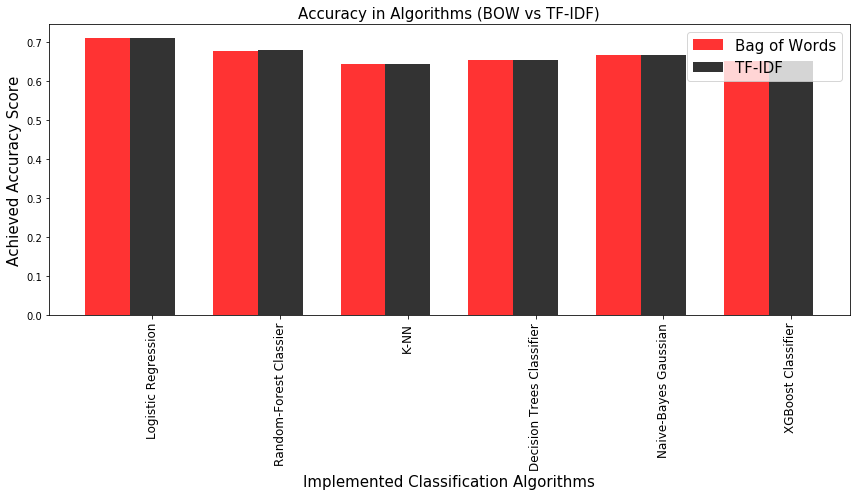

In [48]:
x_axis = ['Logistic Regression', 'Random-Forest Classier','K-NN', 'Decision Trees Classifier', 'Naive-Bayes Gaussian', 'XGBoost Classifier']
y_bow = [logisticreg_bow, randomforest_bow,knn_bow, decision_bow, nbgaussian_bow, xgb_bow]
y_tfidf = [logisticreg_tfidf, randomforest_tfidf,knn_tfidf, decision_tfidf, nbgaussian_tfidf, xgb_tfidf]

# data to plot
n_groups = 6

# create plot
fig, ax = plt.subplots(figsize=(12,7))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y_bow, bar_width,
alpha=opacity,
color='r',
label='Bag of Words')

rects2 = plt.bar(index + bar_width, y_tfidf, bar_width,
alpha=opacity,
color='black',
label='TF-IDF')

plt.xlabel('Implemented Classification Algorithms', fontsize = 15)
plt.ylabel('Achieved Accuracy Score', fontsize = 15)
plt.title('Accuracy in Algorithms (BOW vs TF-IDF)', fontsize = 15)
plt.xticks(index + bar_width, (x_axis), rotation = 90,  fontsize = 12)
plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()

# Inferences
1. Though Logistic Regression, SVM and LinearSVC have similar accuracies to both the computing features (BOW and TF-IDF), we will go ahead and apply **BOW** and **Logistic Regression** to the Canadian Elections 2019 dataset.
2. This is done in the light of the fact that both **SVM** and **LinearSVC** take up a lot of computational time and expensive too.

In [49]:
vectorizer_bow_canada = CountVectorizer(max_features=1000) # Choosing the same no of features here as taken in general elections to maintain same shape of features 
array_bow_canada = vectorizer_bow_canada.fit_transform(canadian_data_1['textclean_tokenized'])

In [50]:
## Encoding the target based on classes of general dataset
canadian_data_1['class'] = canadian_data_1['sentiment'].map({'positive':4,'negative':0})

## Initializing the target variable
y_ele_sentiment=canadian_data_1['class']

# Applying Logistic Regression to Canadian Elections Dataset

In [51]:
def logisticreg_canadian_ele(x1,y1,x2,y2,split_ratio=0.3):
    
    ''' Function implementing the best model from generic tweets dataset on 2019 Canadian election tweets dataset'''
    
    xtrain, xtest, ytrain, ytest = train_test_split(x1,y1,test_size=0.3,random_state=42)
    
    model = LogisticRegression()
    model.fit(xtrain,ytrain)
    
    predictions = model.predict(x2)
    
    score = accuracy_score(y2,predictions)

    print ("The accuracy of the Logistic Regression model applied on the Canadian Elections tweets dataset is: ", score*100)
    
    print(classification_report(y2,predictions))
    
    print (confusion_matrix(y2,predictions))
    
    return predictions, score

In [52]:
predictions, election_score = logisticreg_canadian_ele(array_bow_generic, y, array_bow_canada, y_ele_sentiment)

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression model applied on the Canadian Elections tweets dataset is:  49.27332395686826
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1006
           4       0.52      0.50      0.51      1127

    accuracy                           0.49      2133
   macro avg       0.49      0.49      0.49      2133
weighted avg       0.49      0.49      0.49      2133

[[487 519]
 [563 564]]


In [53]:
## Below model creates a column that states whether the prediction made was correct or incorrect

canadian_data_1['predictions'] = predictions
canadian_data_1['sentiment predicted'] = canadian_data_1['predictions'].map({0:'negative',4:'positive'})
canadian_data_1['Result'] = '0'

for i in range(len(canadian_data_1['Result'])):
    if canadian_data_1['class'][i]==canadian_data_1['predictions'][i]:
        canadian_data_1['Result'][i]='truly_predicted'
    else:
        canadian_data_1['Result'][i]='falsely_predicted'

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [54]:
canadian_data_1.head()

,sentiment,negative_reason,text,textclean,textclean_tokenized,political_party,class,predictions,sentiment predicted,Result
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...,Conservative,0,4,positive,falsely_predicted
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","['b""#allwomanspacewalk it\'s real!\\n \\n#etob...",allwomanspacewalk etobicokenorth cityofto onpo...,None,4,4,positive,truly_predicted
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","['b""#canada #canadaelection2019 #canadavotes \...",canada canadaelection2019 canadavot elxn43 nca...,None,4,0,negative,falsely_predicted
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted


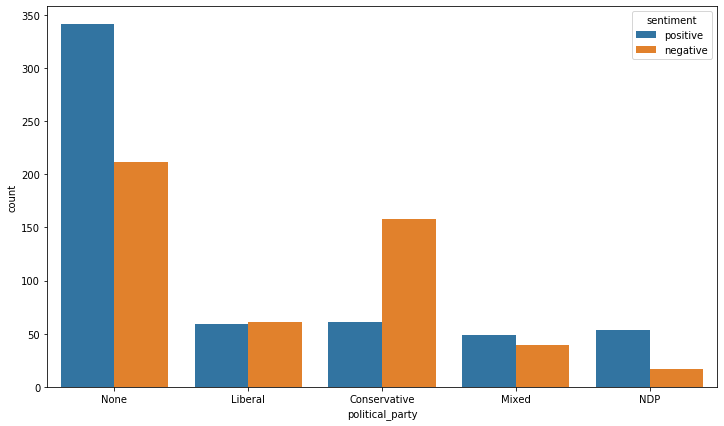

In [55]:
## Looking at the count of positive and negative tweets in correct predictions

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data= canadian_data_1[canadian_data_1['Result']=='truly_predicted'], hue='sentiment')

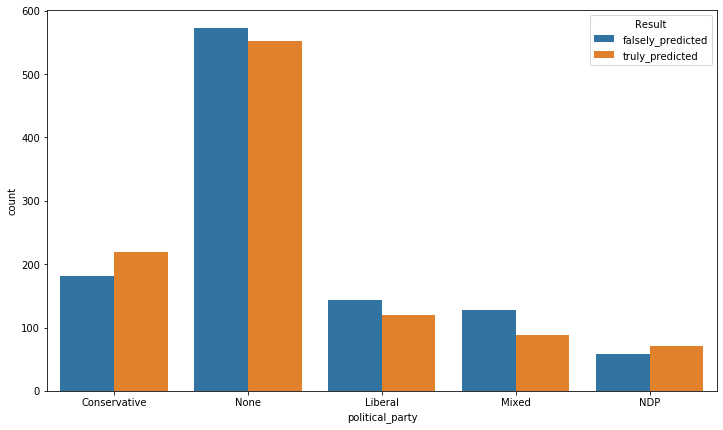

In [56]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=canadian_data_1, hue='Result')

# Splitting the Canadian Elections Dataset into "negative" sentiments only.

In [57]:
## Splitting the dataset to consist only negative tweets of election dataset

canadian_negative_split = canadian_data_1[canadian_data_1['sentiment']=='negative']

In [58]:
canadian_negative_split.head()

,sentiment,negative_reason,text,textclean,textclean_tokenized,political_party,class,predictions,sentiment predicted,Result
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...,Conservative,0,4,positive,falsely_predicted
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","['b""#canadavotes2019 #elxn43 #cdnpoli - facts ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,Conservative,0,4,positive,falsely_predicted
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","['b""#chooseforward #cdnpoli #elxn43\\ncanada, ...",chooseforward cdnpoli elxn43 ncanada america m...,None,0,4,positive,falsely_predicted


In [59]:
## Finding the count of each negative reason

canadian_negative_split.groupby(['negative_reason'])['negative_reason'].count()

negative_reason
Climate Problem                         41
Economy                                 51
Healthcare                               5
Healthcare and Marijuana                 4
Others                                 364
Privilege                               12
Scandal                                270
Separation                              16
Tell lies                              198
Women Reproductive right and Racism     45
Name: negative_reason, dtype: int64

In [60]:
## Combining the classes as per the reasons given above

canadian_negative_split=canadian_negative_split.reset_index()
canadian_negative_split['Similar_Reasons'] = '0'

for i in range(len(canadian_negative_split['negative_reason'])):
    if (canadian_negative_split['negative_reason'][i]=='Climate Problem'):
        canadian_negative_split['Similar_Reasons'][i] = 'Climate Problem'
    elif (canadian_negative_split['negative_reason'][i]=='Economy') | (canadian_negative_split['negative_reason'][i]=='Privilege') :
        canadian_negative_split['Similar_Reasons'][i] = 'Economy'
    elif (canadian_negative_split['negative_reason'][i]=='Healthcare') | (canadian_negative_split['negative_reason'][i]=='Healthcare and Marijuana') | (canadian_negative_split['negative_reason'][i]=='Women Reproductive right and Racism') :
        canadian_negative_split['Similar_Reasons'][i] = 'Healthcare'
    elif canadian_negative_split['negative_reason'][i]=='Separation' :
        canadian_negative_split['Similar_Reasons'][i] = 'Separation'
    elif (canadian_negative_split['negative_reason'][i]=='Tell lies') | (canadian_negative_split['negative_reason'][i]=='Scandal') :
        canadian_negative_split['Similar_Reasons'][i] = 'Swindle'
    elif canadian_negative_split['negative_reason'][i]=='Others':
        canadian_negative_split['Similar_Reasons'][i] = 'Others'        

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [61]:
canadian_negative_split.head()

,index,sentiment,negative_reason,text,textclean,textclean_tokenized,political_party,class,predictions,sentiment predicted,Result,Similar_Reasons
0,0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...,Conservative,0,4,positive,falsely_predicted,Healthcare
1,2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted,Economy
2,4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted,Economy
3,5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...","['b""#canadavotes2019 #elxn43 #cdnpoli - facts ...",canadavotes2019 elxn43 cdnpoli fact blastfromt...,Conservative,0,4,positive,falsely_predicted,Others
4,8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...","['b""#chooseforward #cdnpoli #elxn43\\ncanada, ...",chooseforward cdnpoli elxn43 ncanada america m...,None,0,4,positive,falsely_predicted,Others


In [62]:
# Implementing Bag of Words on the splitted negative Canadian Elections Twitter dataset

vectorizer_bow_can_ele_neg = CountVectorizer()
array_bow_can_ele_neg = vectorizer_bow_can_ele_neg.fit_transform(canadian_negative_split['textclean_tokenized'])

In [63]:
## Setting the target variable as the classes of reasons

y_election_negative=canadian_negative_split['Similar_Reasons']

# Applying the three models to the new negative tweets dataframe

In [64]:
logisticreg(array_bow_can_ele_neg,y_election_negative) 

The accuracy of the Logistic Regression model is:  63.90728476821192
                 precision    recall  f1-score   support

Climate Problem       1.00      0.26      0.42        19
        Economy       0.56      0.38      0.45        13
     Healthcare       1.00      0.10      0.18        10
         Others       0.60      0.70      0.65       119
     Separation       1.00      0.25      0.40         4
        Swindle       0.66      0.72      0.69       137

       accuracy                           0.64       302
      macro avg       0.80      0.40      0.46       302
   weighted avg       0.67      0.64      0.62       302

[[ 5  0  0  8  0  6]
 [ 0  5  0  3  0  5]
 [ 0  1  1  5  0  3]
 [ 0  1  0 83  0 35]
 [ 0  0  0  2  1  1]
 [ 0  2  0 37  0 98]]


/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6390728476821192

In [65]:
decisiontree_model(array_bow_can_ele_neg,y_election_negative)

The accuracy of the Decision Tree Classifier model is:  64.56953642384106
                 precision    recall  f1-score   support

Climate Problem       1.00      0.37      0.54        19
        Economy       0.33      0.62      0.43        13
     Healthcare       0.62      0.50      0.56        10
         Others       0.62      0.65      0.63       119
     Separation       0.67      0.50      0.57         4
        Swindle       0.71      0.70      0.70       137

       accuracy                           0.65       302
      macro avg       0.66      0.56      0.57       302
   weighted avg       0.67      0.65      0.65       302

[[ 7  1  0  9  0  2]
 [ 0  8  0  3  0  2]
 [ 0  2  5  0  0  3]
 [ 0  7  3 77  0 32]
 [ 0  0  0  1  2  1]
 [ 0  6  0 34  1 96]]


0.6456953642384106

In [66]:
random_forest(array_bow_can_ele_neg,y_election_negative)

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  61.258278145695364
                 precision    recall  f1-score   support

Climate Problem       0.75      0.16      0.26        19
        Economy       0.57      0.31      0.40        13
     Healthcare       0.86      0.60      0.71        10
         Others       0.56      0.79      0.65       119
     Separation       0.00      0.00      0.00         4
        Swindle       0.68      0.57      0.62       137

       accuracy                           0.61       302
      macro avg       0.57      0.40      0.44       302
   weighted avg       0.63      0.61      0.60       302

[[ 3  2  0  7  0  7]
 [ 0  4  0  6  0  3]
 [ 0  0  6  1  0  3]
 [ 1  1  0 94  0 23]
 [ 0  0  0  4  0  0]
 [ 0  0  1 57  1 78]]


0.6125827814569537

## Research question answered in the slides

# Bonus

# Hyperparameter Tuning

In [67]:
decisiontree_model(array_bow_can_ele_neg,y_election_negative)

The accuracy of the Decision Tree Classifier model is:  64.56953642384106
                 precision    recall  f1-score   support

Climate Problem       1.00      0.37      0.54        19
        Economy       0.33      0.62      0.43        13
     Healthcare       0.62      0.50      0.56        10
         Others       0.62      0.65      0.63       119
     Separation       0.67      0.50      0.57         4
        Swindle       0.71      0.70      0.70       137

       accuracy                           0.65       302
      macro avg       0.66      0.56      0.57       302
   weighted avg       0.67      0.65      0.65       302

[[ 7  1  0  9  0  2]
 [ 0  8  0  3  0  2]
 [ 0  2  5  0  0  3]
 [ 0  7  3 77  0 32]
 [ 0  0  0  1  2  1]
 [ 0  6  0 34  1 96]]


0.6456953642384106

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
x = array_bow_can_ele_neg

In [70]:
y = y_election_negative

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [72]:
model= DecisionTreeClassifier(random_state=42)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(xtrain,ytrain)
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction_dft_hy=model1.predict(xtest)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction_dft_hy,ytest))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_dft_hy,ytest))

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.5761589403973509
Confusion Metrix:
 [[ 7  1  0  3  0  1]
 [ 3  3  2  4  0  2]
 [ 0  0  3  0  0  3]
 [ 7  5  2 82  3 52]
 [ 0  0  0  0  0  0]
 [ 2  4  3 30  1 79]]


/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l2"],"solver":['newton-cg','lbfgs','liblinear','sag']}# l1 lasso l2 ridge

model_cv=GridSearchCV(model,grid,cv=10)
model_cv.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to 

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to 

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to 

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Con

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-pack

/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-pack

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.59375


In [74]:
prediction_lr_hyp=model_cv.predict(xtest)

In [75]:
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction_lr_hyp,ytest))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_lr_hyp,ytest))

Accuracy: 0.6125827814569537
Confusion Metrix:
 [[ 6  0  0  0  0  0]
 [ 0  4  1  1  0  3]
 [ 0  0  3  0  0  0]
 [ 7  4  2 82  2 45]
 [ 0  0  0  0  1  0]
 [ 6  5  4 36  1 89]]


In [76]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [77]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 10, verbose = 2)

In [78]:
grid_search.fit(xtrain, ytrain)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_feat

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2,

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_feat

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_feat

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3,

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_feature

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_feat

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_s

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, mi

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_feature

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2,

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, 

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100,

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2,

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   4.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_featu

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   1.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, ma

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3,

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3,

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100,

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, 

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2,

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2,

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110,

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   1.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3,

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3,

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   1.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110,

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   1.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_fe

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3,

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 31.4min finished
/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [79]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [80]:
param_grid = {
    'bootstrap': [True],
    'max_depth': 80,
    'max_features': 2,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 100
}
# Create a based model
model = RandomForestClassifier()


In [81]:
model.fit(xtrain, ytrain)
prediction_rfc_hy=model.predict(xtest)
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction_rfc_hy,ytest))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_rfc_hy,ytest))

Accuracy: 0.5794701986754967
Confusion Metrix:
 [[ 3  0  0  0  0  0]
 [ 3  3  0  1  0  3]
 [ 0  0  4  0  0  0]
 [ 5  8  3 91  3 60]
 [ 0  0  0  0  0  0]
 [ 8  2  3 27  1 74]]


/Users/kunalbambardekar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
canadian_data_1.head()

,sentiment,negative_reason,text,textclean,textclean_tokenized,political_party,class,predictions,sentiment predicted,Result
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...","['b"" so instead of your suggestion, how about ...",suggest agre canadian women trust andrewsch co...,Conservative,0,4,positive,falsely_predicted
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...","['b""#allwomanspacewalk it\'s real!\\n \\n#etob...",allwomanspacewalk etobicokenorth cityofto onpo...,None,4,4,positive,truly_predicted
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...","['b""#brantford it\'s going to cost you $94 bil...",brantford go cost 94 billion 4 year justin elx...,Liberal,0,4,positive,falsely_predicted
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...","['b""#canada #canadaelection2019 #canadavotes \...",canada canadaelection2019 canadavot elxn43 nca...,None,4,0,negative,falsely_predicted
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...","['b""#canada #taxpayers are sick & tired of hav...",canada taxpay sick tire earn donat corpor welf...,Liberal,0,0,negative,truly_predicted


# Exploratory Data Analysis 

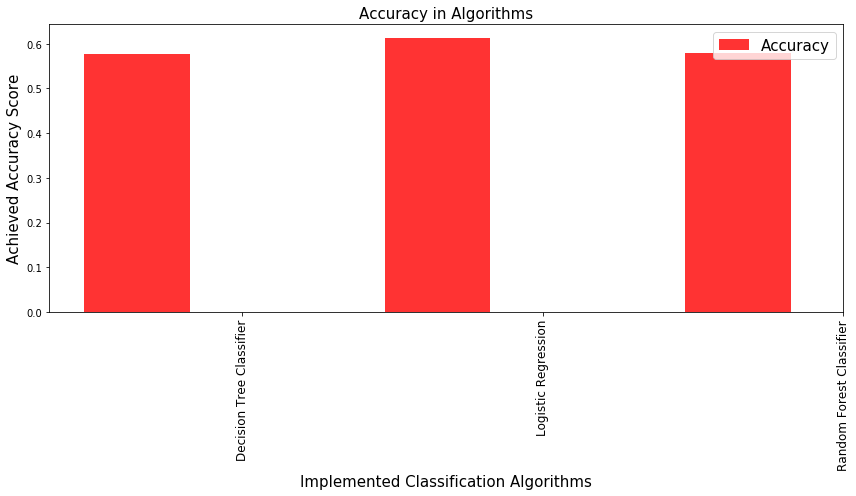

In [88]:
x_axis = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier']
#y_bow = [logisticreg_bow, randomforest_bow,knn_bow, decision_bow, LinearSVC_bow , SVM_bow, nbgaussian_bow, xgb_bow]
#y_tfidf = [logisticreg_tfidf, randomforest_tfidf,knn_tfidf, decision_tfidf, LinearSVC_tfidf, SVM_tfidf, nbgaussian_tfidf, xgb_tfidf]
y_axis = [metrics.accuracy_score(prediction_dft_hy,ytest),metrics.accuracy_score(prediction_lr_hyp,ytest),metrics.accuracy_score(prediction_rfc_hy,ytest)]
# data to plot
n_groups = 3

# create plot
fig, ax = plt.subplots(figsize=(12,7))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y_axis, bar_width,
alpha=opacity,
color='r',
label='Accuracy')

#rects2 = plt.bar(index + bar_width, y_tfidf, bar_width,
#alpha=opacity,
#color='black',
#label='TF-IDF')

plt.xlabel('Implemented Classification Algorithms', fontsize = 15)
plt.ylabel('Achieved Accuracy Score', fontsize = 15)
plt.title('Accuracy in Algorithms', fontsize = 15)
plt.xticks(index + bar_width, (x_axis), rotation = 90,  fontsize = 12)
plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()

In [89]:
data = canadian_negative_split.groupby(['negative_reason'])['negative_reason'].count()

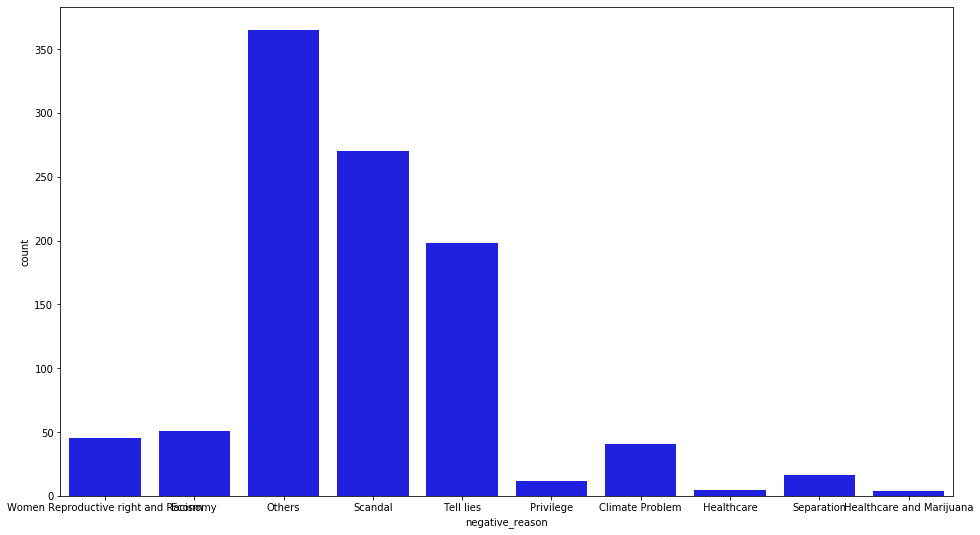

In [108]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x='negative_reason', data=canadian_data_1, color= 'b')